In [57]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [58]:

path=r'C:\Users\SUDHIR REDDY\Desktop\Skin_Cancer\hmnist_28_28_RGB.csv'
df=pd.read_csv(path)
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [59]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [48]:
print(len(train_set))

8012


In [60]:
print(len(test_set))

2003


In [61]:
df.label.unique()

array([6, 4, 1, 2, 0, 5, 3], dtype=int64)

In [62]:
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [63]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [64]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


<Axes: ylabel='count'>

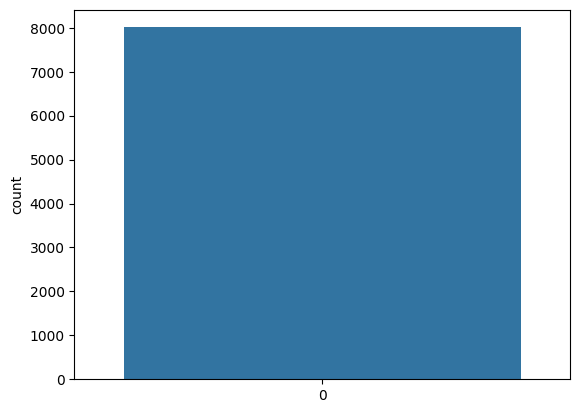

In [66]:
import seaborn as sns

sns.countplot(train_set['label'])

In [68]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

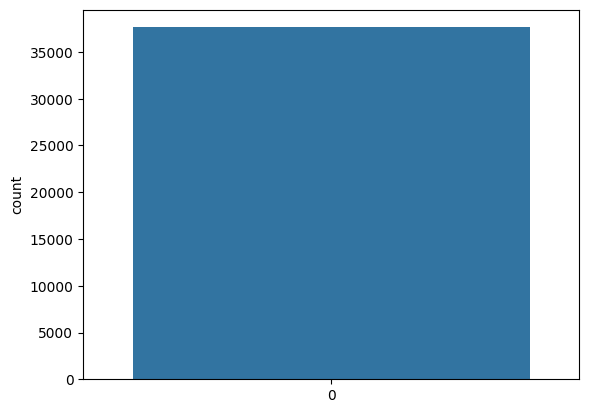

In [69]:
sns.countplot(y_train)

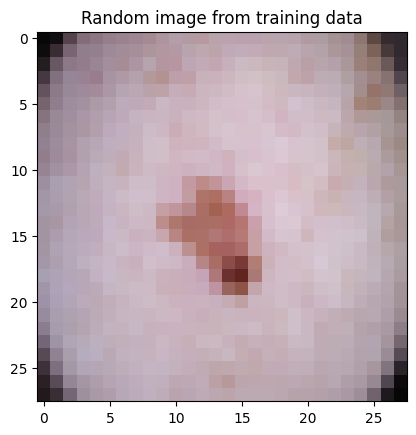

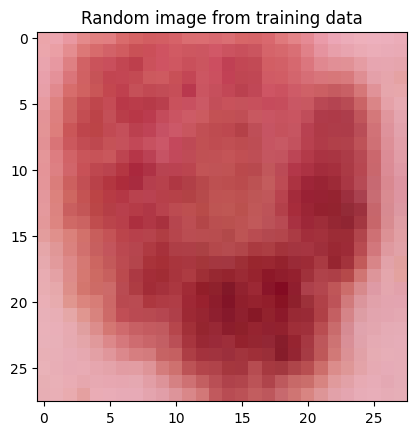

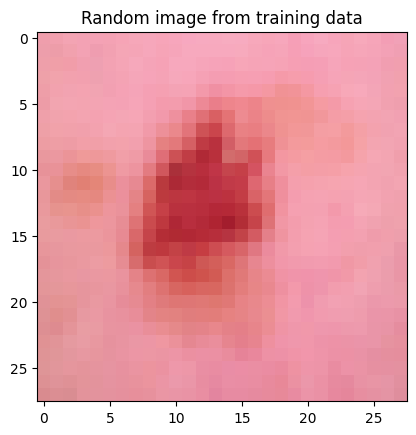

In [70]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [72]:
%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

In [73]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [74]:
%time 

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


In [75]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/236 [============================>.] - ETA: 0s - loss: 1.2933 - accuracy: 0.5205WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 94ms/step - loss: 1.2930 - accuracy: 0.5206 - val_loss: 2.8167 - val_accuracy: 0.1234
Epoch 2/50
235/236 [============================>.] - ETA: 0s - loss: 0.4558 - accuracy: 0.8506WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.4556 - accuracy: 0.8507 - val_loss: 1.5745 - val_accuracy: 0.3952
Epoch 3/50
235/236 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.9078WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.2756 - accuracy: 0.9078 - val_loss: 1.3652 - val_accuracy: 0.4598
Epoch 4/50
235/236 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9269WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 90ms/step - loss: 0.2134 - accuracy: 0.9269 - val_loss: 1.3251 - val_accuracy: 0.4837
Epoch 5/50
235/236 [============================>.] - ETA: 0s - loss: 0.1764 - accuracy: 0.9394WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 88ms/step - loss: 0.1765 - accuracy: 0.9394 - val_loss: 1.0809 - val_accuracy: 0.5097
Epoch 6/50
235/236 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9434WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 88ms/step - loss: 0.1652 - accuracy: 0.9434 - val_loss: 0.6175 - val_accuracy: 0.6597
Epoch 7/50
235/236 [============================>.] - ETA: 0s - loss: 0.1182 - accuracy: 0.9591WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.1183 - accuracy: 0.9591 - val_loss: 0.6684 - val_accuracy: 0.6941
Epoch 8/50
235/236 [============================>.] - ETA: 0s - loss: 0.1196 - accuracy: 0.9580WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.1196 - accuracy: 0.9580 - val_loss: 0.5070 - val_accuracy: 0.7865
Epoch 9/50
235/236 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9633WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.1060 - accuracy: 0.9632 - val_loss: 1.0753 - val_accuracy: 0.5121
Epoch 10/50
235/236 [============================>.] - ETA: 0s - loss: 0.1292 - accuracy: 0.9562WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.1292 - accuracy: 0.9562 - val_loss: 0.8570 - val_accuracy: 0.7148
Epoch 11/50
235/236 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9725WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0788 - accuracy: 0.9725 - val_loss: 0.4368 - val_accuracy: 0.7803
Epoch 12/50
235/236 [============================>.] - ETA: 0s - loss: 0.0708 - accuracy: 0.9752WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0708 - accuracy: 0.9752 - val_loss: 0.4255 - val_accuracy: 0.8168
Epoch 13/50
235/236 [============================>.] - ETA: 0s - loss: 0.0683 - accuracy: 0.9770WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0682 - accuracy: 0.9770 - val_loss: 0.4460 - val_accuracy: 0.8276
Epoch 14/50
235/236 [============================>.] - ETA: 0s - loss: 0.0750 - accuracy: 0.9743WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0751 - accuracy: 0.9743 - val_loss: 0.9149 - val_accuracy: 0.6724
Epoch 15/50
235/236 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9791WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0610 - accuracy: 0.9790 - val_loss: 0.5520 - val_accuracy: 0.7806
Epoch 16/50
235/236 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9838WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 0.3958 - val_accuracy: 0.8337
Epoch 17/50
235/236 [============================>.] - ETA: 0s - loss: 0.0525 - accuracy: 0.9823WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0525 - accuracy: 0.9824 - val_loss: 0.7629 - val_accuracy: 0.6801
Epoch 18/50
235/236 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9820WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0521 - accuracy: 0.9819 - val_loss: 0.2926 - val_accuracy: 0.8794
Epoch 19/50
235/236 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9846WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.2864 - val_accuracy: 0.8874
Epoch 20/50
235/236 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9856WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0414 - accuracy: 0.9856 - val_loss: 0.2602 - val_accuracy: 0.8773
Epoch 21/50
235/236 [============================>.] - ETA: 0s - loss: 0.0386 - accuracy: 0.9878WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.2660 - val_accuracy: 0.8796
Epoch 22/50
235/236 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9910WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.3656 - val_accuracy: 0.8844
Epoch 23/50
235/236 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9862WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.1951 - val_accuracy: 0.9222
Epoch 24/50
235/236 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.9863WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0398 - accuracy: 0.9863 - val_loss: 0.5215 - val_accuracy: 0.7977
Epoch 25/50
235/236 [============================>.] - ETA: 0s - loss: 0.0291 - accuracy: 0.9901WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.8902 - val_accuracy: 0.7286
Epoch 26/50
235/236 [============================>.] - ETA: 0s - loss: 0.0341 - accuracy: 0.9891WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.2808 - val_accuracy: 0.8919
Epoch 27/50
235/236 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9856WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.0515 - val_accuracy: 0.9819
Epoch 28/50
235/236 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9934WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.5253 - val_accuracy: 0.8289
Epoch 29/50
235/236 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.2092 - val_accuracy: 0.9296
Epoch 30/50
235/236 [============================>.] - ETA: 0s - loss: 0.0245 - accuracy: 0.9919WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.1602 - val_accuracy: 0.9447
Epoch 31/50
235/236 [============================>.] - ETA: 0s - loss: 0.0394 - accuracy: 0.9880WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0691 - val_accuracy: 0.9748
Epoch 32/50
235/236 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 91ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.1227 - val_accuracy: 0.9503
Epoch 33/50
235/236 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0474 - val_accuracy: 0.9865
Epoch 34/50
235/236 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9927WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0879 - val_accuracy: 0.9653
Epoch 35/50
235/236 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9918WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 88ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.2704 - val_accuracy: 0.9218
Epoch 36/50
235/236 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9920WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0764 - val_accuracy: 0.9720
Epoch 37/50
235/236 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.2305 - val_accuracy: 0.9382
Epoch 38/50
235/236 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9920WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 87ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0930 - val_accuracy: 0.9696
Epoch 39/50
235/236 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9951WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.3257 - val_accuracy: 0.9022
Epoch 40/50
235/236 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9916WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0851 - val_accuracy: 0.9712
Epoch 41/50
235/236 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9953WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 22s 92ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.1055 - val_accuracy: 0.9621
Epoch 42/50
235/236 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 84ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.4433 - val_accuracy: 0.8409
Epoch 43/50
235/236 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.3389 - val_accuracy: 0.8932
Epoch 44/50
235/236 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.6220 - val_accuracy: 0.8556
Epoch 45/50
235/236 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9918WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.1916 - val_accuracy: 0.9404
Epoch 46/50
235/236 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9960WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 87ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.5110 - val_accuracy: 0.8706
Epoch 47/50
235/236 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9959WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 84ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0727 - val_accuracy: 0.9790
Epoch 48/50
235/236 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9955WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 87ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0935 - val_accuracy: 0.9685
Epoch 49/50
235/236 [============================>.] - ETA: 0s - loss: 0.0136 - accuracy: 0.9959WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.1100 - val_accuracy: 0.9675
Epoch 50/50
235/236 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0581 - val_accuracy: 0.9768
Duration: 0:16:53.140540


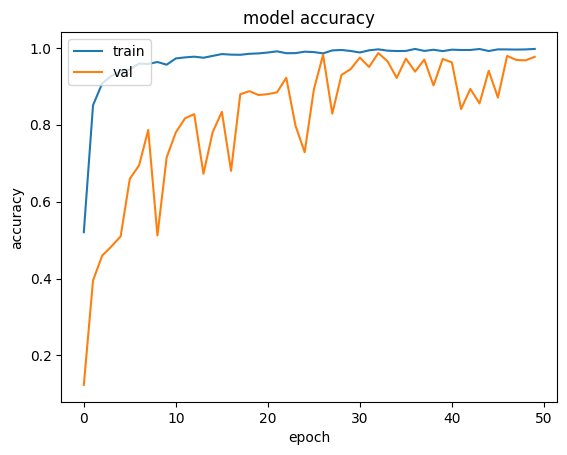

In [76]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

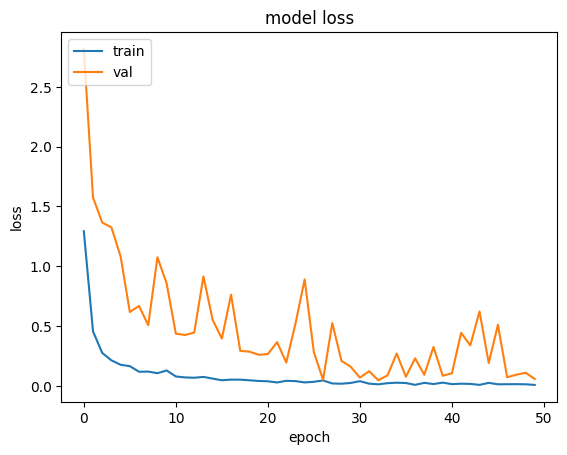

In [77]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [78]:
model.save('best_model.h5')

In [79]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.7077 - accuracy: 0.7249 - 606ms/epoch - 10ms/step


In [80]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 7ms/step


In [81]:
print(conf_mat)

[[  10    5   14    1   18    1    9]
 [  11   35   14    2   34    3    6]
 [   9    5   80    2  101    2   38]
 [   0    1    3    5   11    0    1]
 [   8    8   22    3 1213    4   70]
 [   0    1    0    0    2   18    0]
 [   4    3   18    0  114    3   91]]


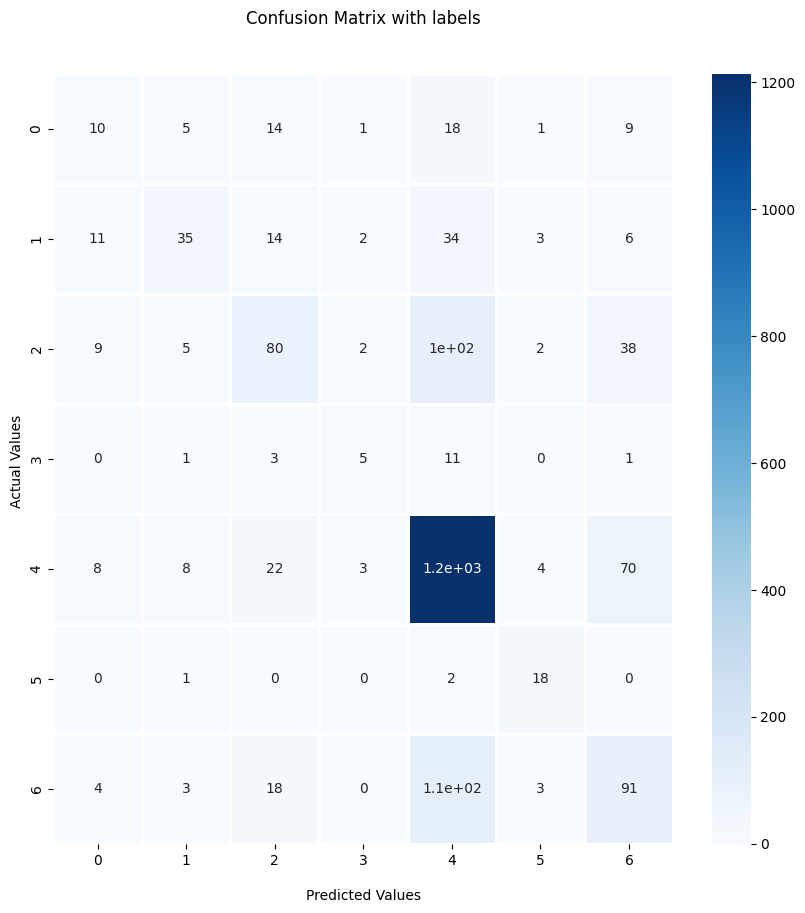

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

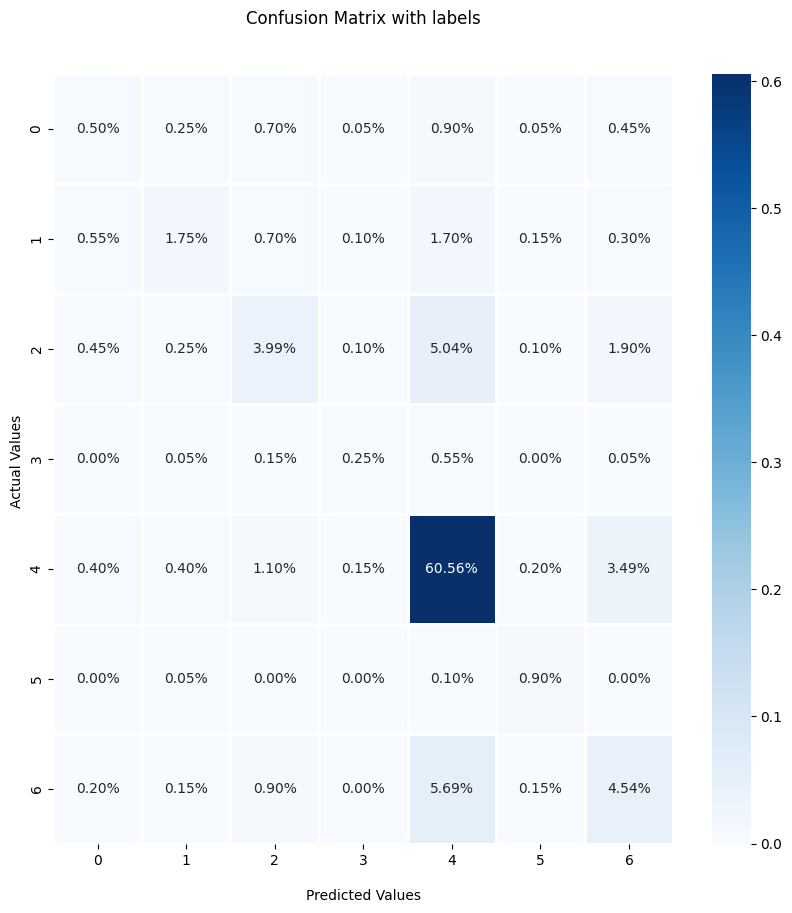

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [84]:
import PIL

image=PIL.Image.open(r'C:\Users\SUDHIR REDDY\Desktop\Skin_Cancer\tester.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 [==============================] - 0s 173ms/step
[9.2968630e-06 1.8538227e-05 1.9830981e-05 1.6299207e-05 8.7638648e-04
 3.1994456e-05 9.9902773e-01]
('mel', 'melanoma')
